## PROBLEM STATEMENT

 This is called Cross-industry standard process for data mining, known as CRISP-DM




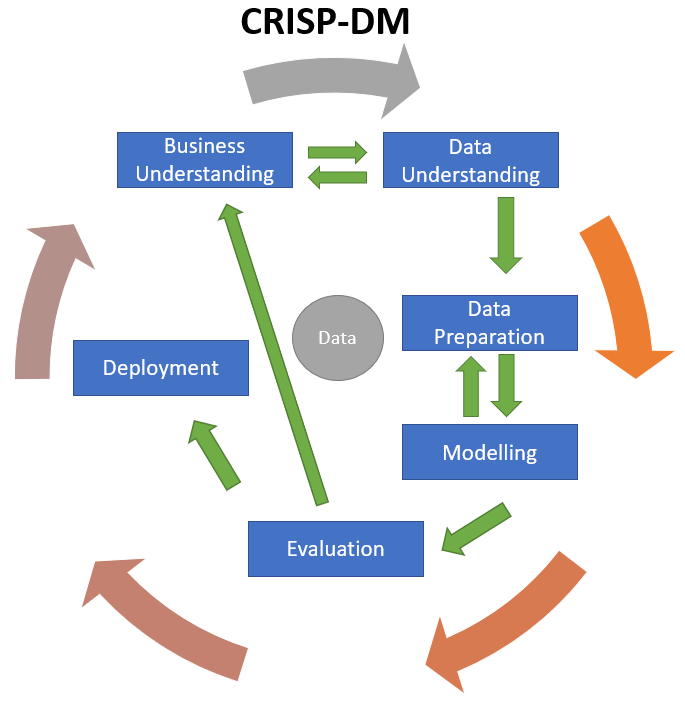

### 1.Business Understanding
The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines
#### Objective
We want to predict the species of iris flower(Iris Setosa, Iris virginica, and Iris versicolor)


In [106]:
#importing libraries
import pandas as pd #for data manipulation,data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np #for numerical calculation
import matplotlib.pyplot as plt#for plotting
%matplotlib inline
import seaborn as sns#for interactive plotting with colors /used for plot interactive graph. I like it most for plot
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [107]:
#reading our dataset
iris_data=pd.read_csv("IRIS.csv")

### 2.Data understanding

In [108]:
#previewing the first 5 rows of the data
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [109]:
#preview the last 5 rows of the dataset
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [110]:
#previewing random rows
iris_data.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
38,4.4,3.0,1.3,0.2,Iris-setosa


In [111]:
#previewing 10 rows
iris_data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,Iris-versicolor
23,5.1,3.3,1.7,0.5,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
103,6.3,2.9,5.6,1.8,Iris-virginica
95,5.7,3.0,4.2,1.2,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
147,6.5,3.0,5.2,2.0,Iris-virginica
81,5.5,2.4,3.7,1.0,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
35,5.0,3.2,1.2,0.2,Iris-setosa


In [112]:
#previewing the first 10 rows
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [113]:
#previweing sepal_lenght 5 rows
iris_data["sepal_length"].head(10)

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
5    5.4
6    4.6
7    5.0
8    4.4
9    4.9
Name: sepal_length, dtype: float64

In [114]:
#previewing sepal_length and sepal_width
iris_data[["sepal_length","sepal_width"]].head(10)

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


In [115]:
#previewing the columns
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [116]:
#previewing the dimensions or shape (rows and columns)of the data
iris_data.shape

(150, 5)

### there are 150 rows and 5 columns

In [117]:
#previewing the information about the dataset
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [118]:
#previewing the summary numerical statistics of our data
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [119]:
#previewing both numerical and categorical statistics
iris_data.describe(include="all")

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [120]:
#checking for missing values in our data
iris_data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [121]:
#checking duplicates
iris_data.duplicated().any()

True

In [122]:
#checking unique values
iris_data.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

## 3.Exploratory Data Analysis --Data Wrangling\Cleaning


In [123]:
#dropping duplicates
iris_data.drop_duplicates(inplace=True)

In [124]:
#checking duplicates
iris_data.duplicated().any()

False

## 4.Data analysis and visualization

### A  .univariate analysis

<AxesSubplot:ylabel='species'>

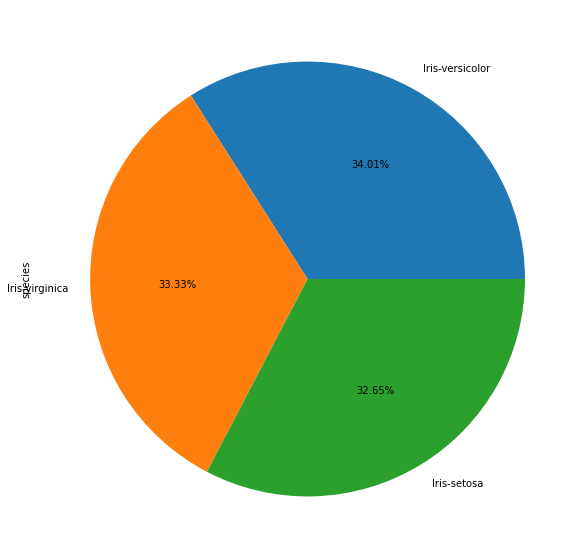

In [125]:
#visualizing species
plt.figure(figsize=(20,10))
iris_data["species"].value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:ylabel='Frequency'>

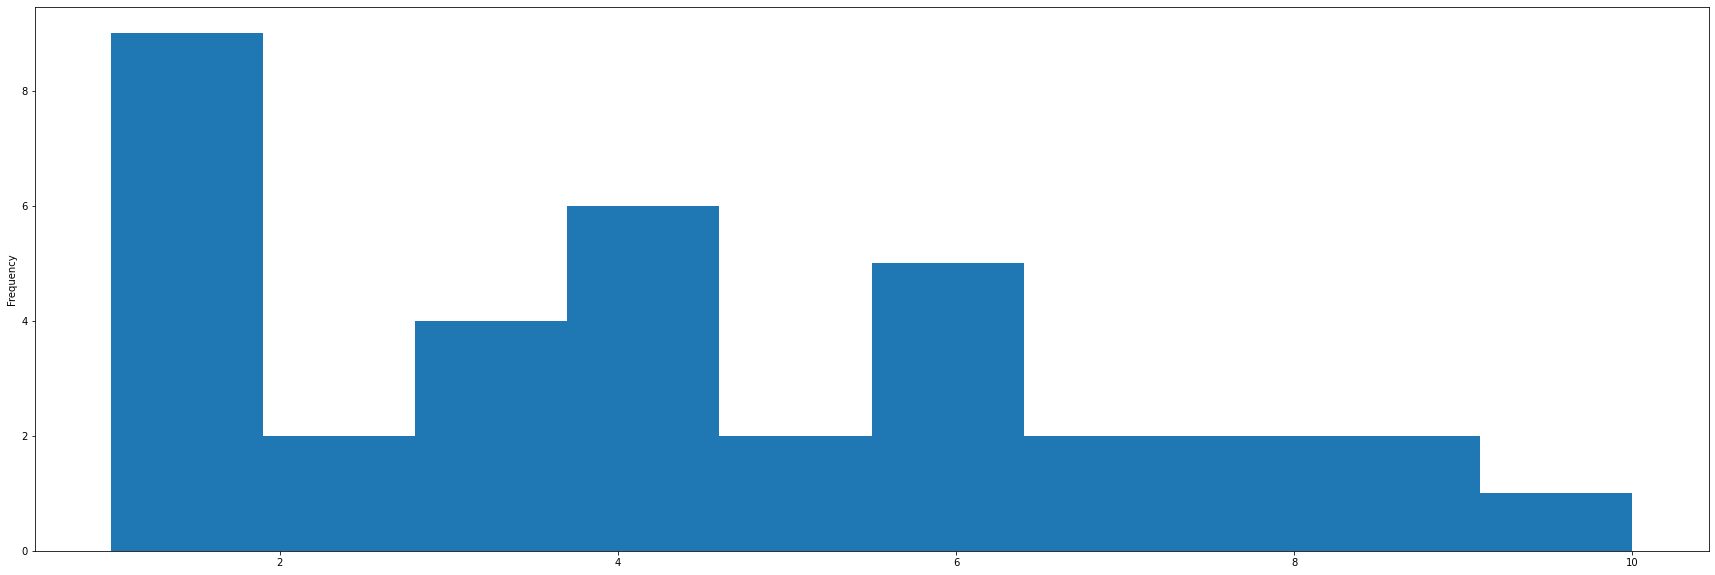

In [126]:
#visualizing sepal_length
plt.figure(figsize=(30,10))
iris_data["sepal_length"].value_counts().plot(kind='hist')

<AxesSubplot:>

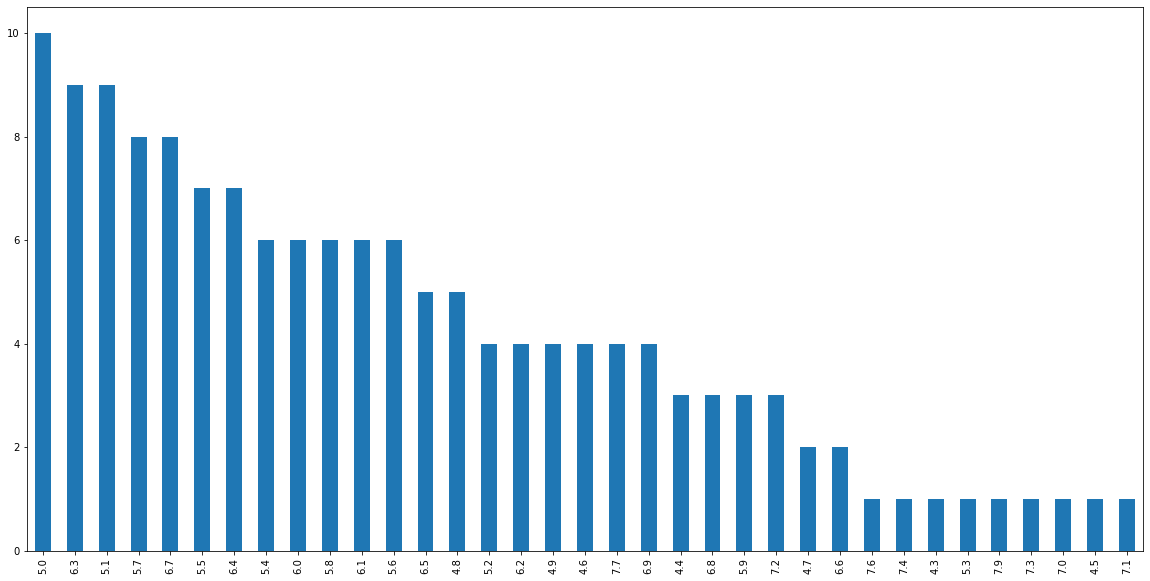

In [127]:
plt.figure(figsize=(20,10))
iris_data["sepal_length"].value_counts().plot(kind='bar')

<AxesSubplot:>

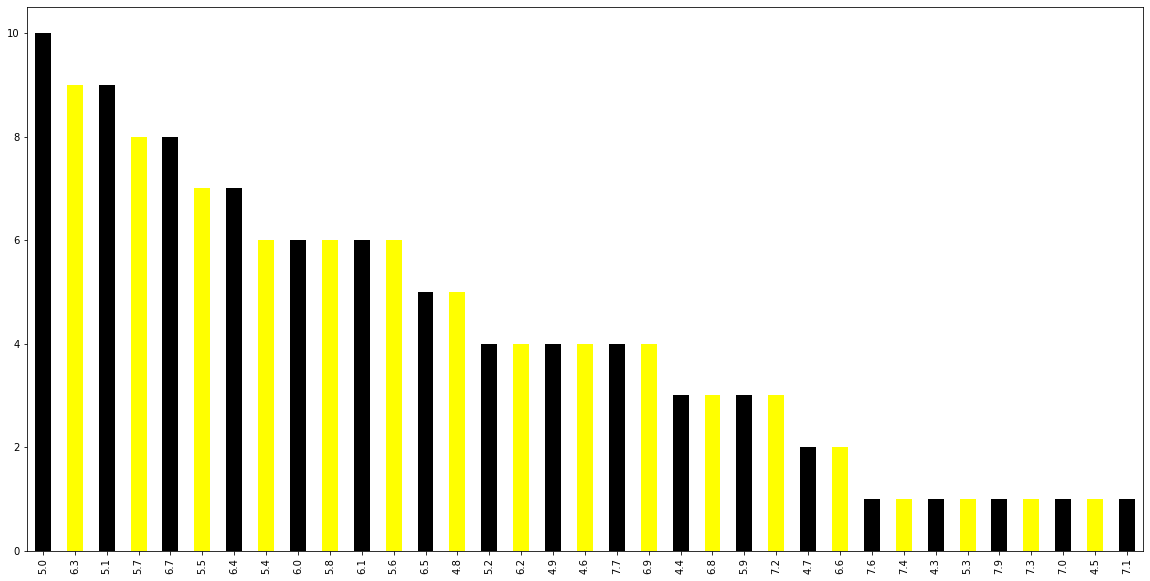

In [128]:
plt.figure(figsize=(20,10))
iris_data["sepal_length"].value_counts().plot(kind='bar',color=['black','yellow'])

<AxesSubplot:xlabel='sepal_length', ylabel='count'>

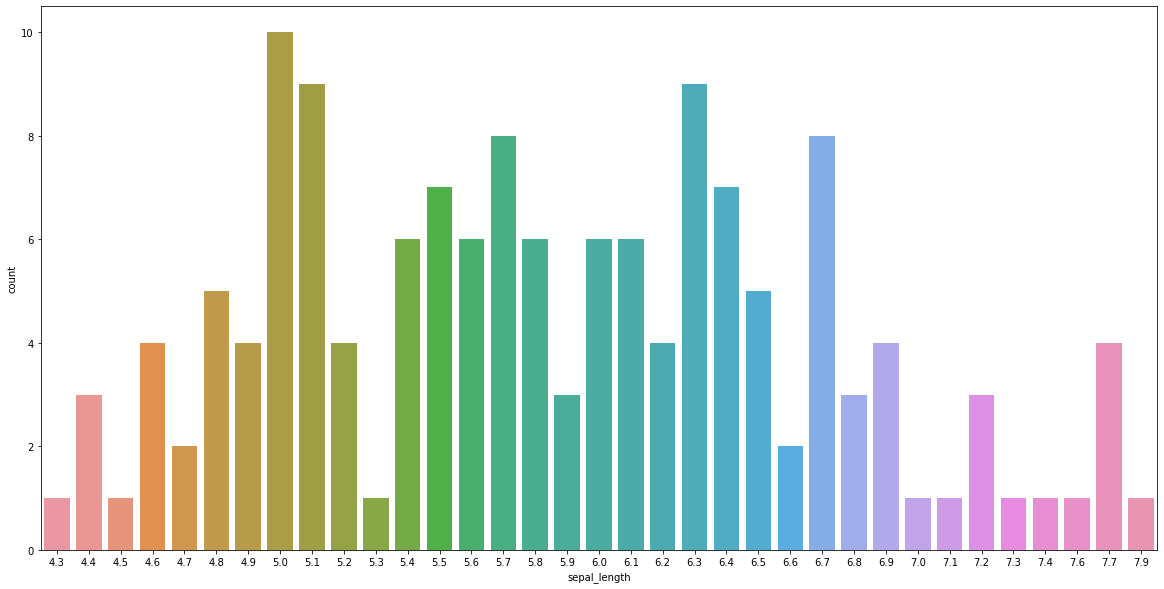

In [129]:
plt.figure(figsize=(20,10))
sns. countplot(x='sepal_length', data=iris_data)

### B .Bivariate Analysis

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

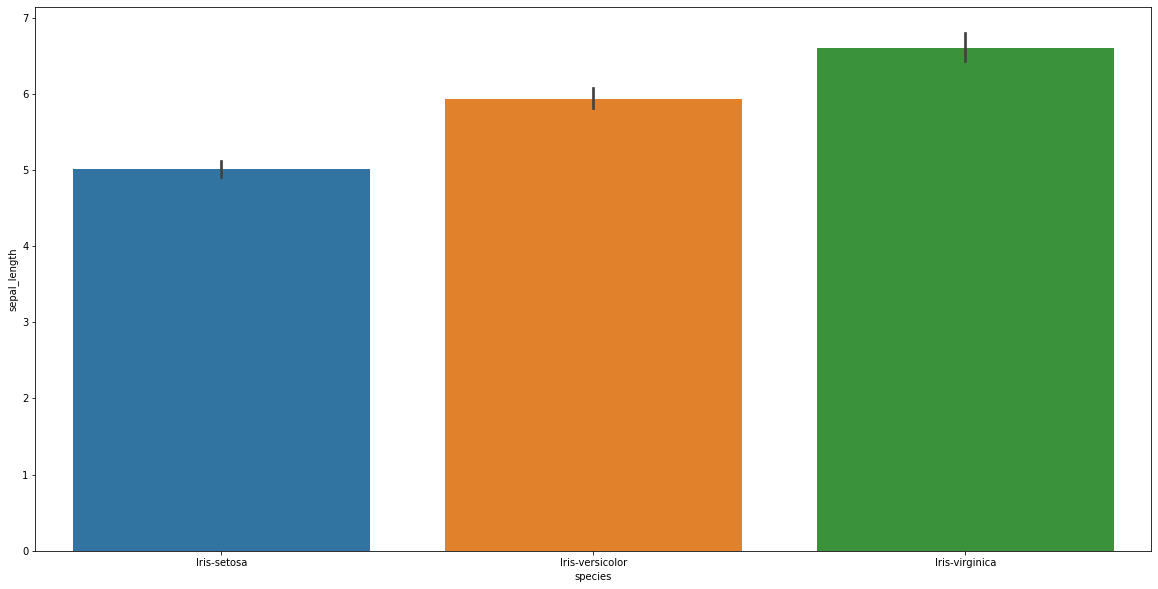

In [130]:
plt.figure(figsize=(20,10))
sns.barplot(y='sepal_length',x='species', data=iris_data)

<AxesSubplot:xlabel='sepal_width', ylabel='species'>

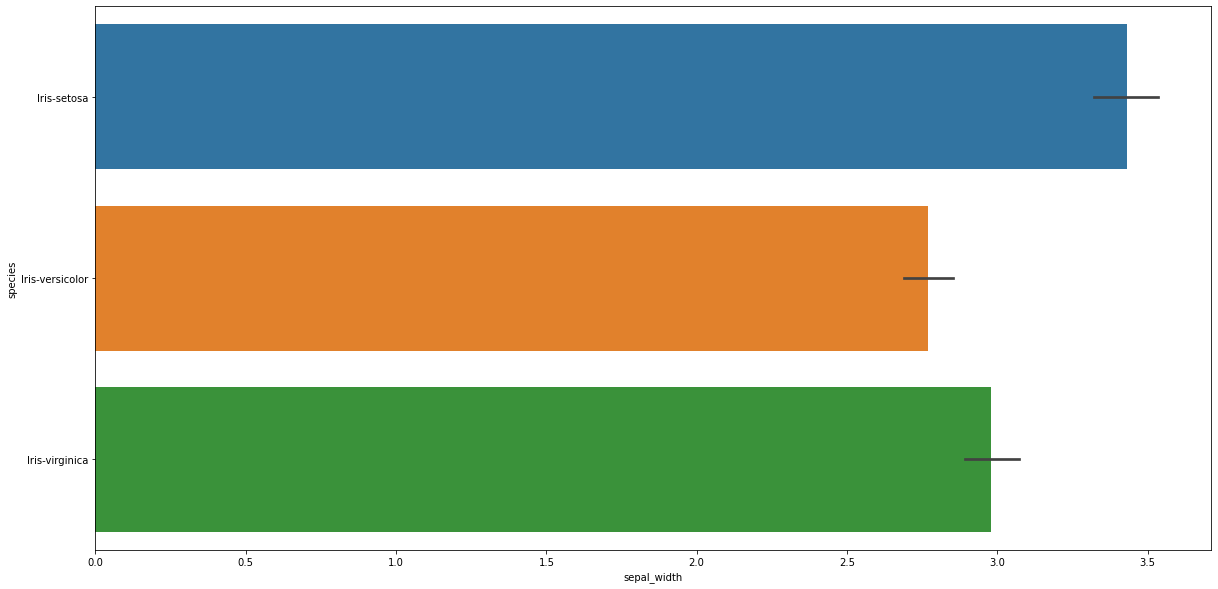

In [131]:
plt.figure(figsize=(20,10))
sns.barplot(x='sepal_width',y='species', data=iris_data)

<AxesSubplot:xlabel='petal_length', ylabel='species'>

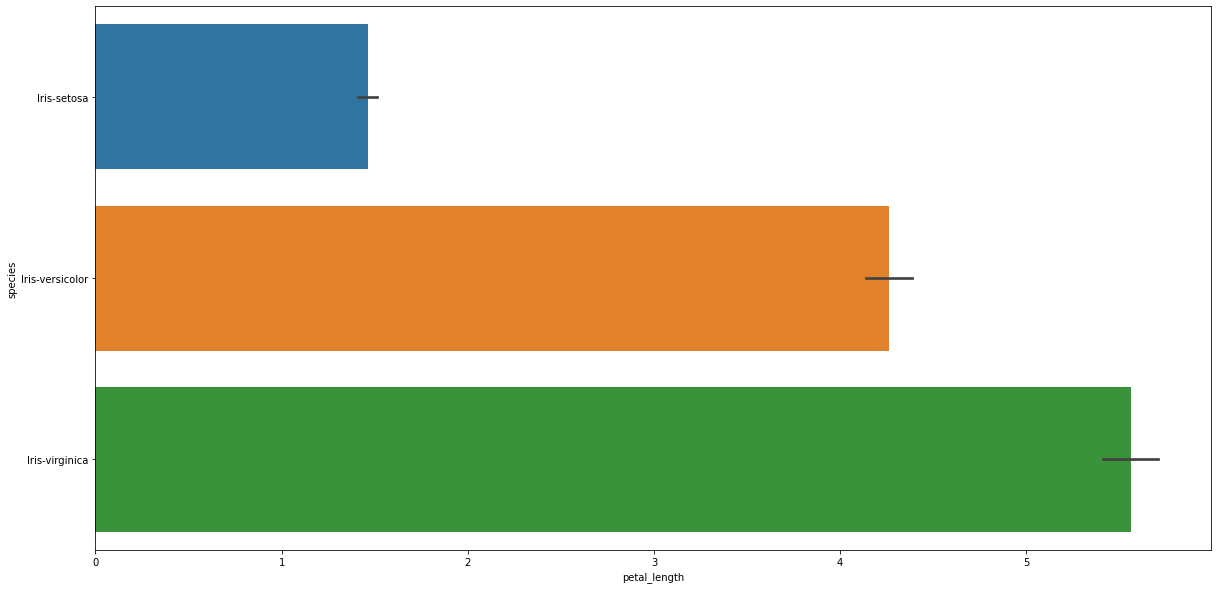

In [132]:
plt.figure(figsize=(20,10))
sns.barplot(x='petal_length',y='species', data=iris_data)

<AxesSubplot:xlabel='petal_width', ylabel='species'>

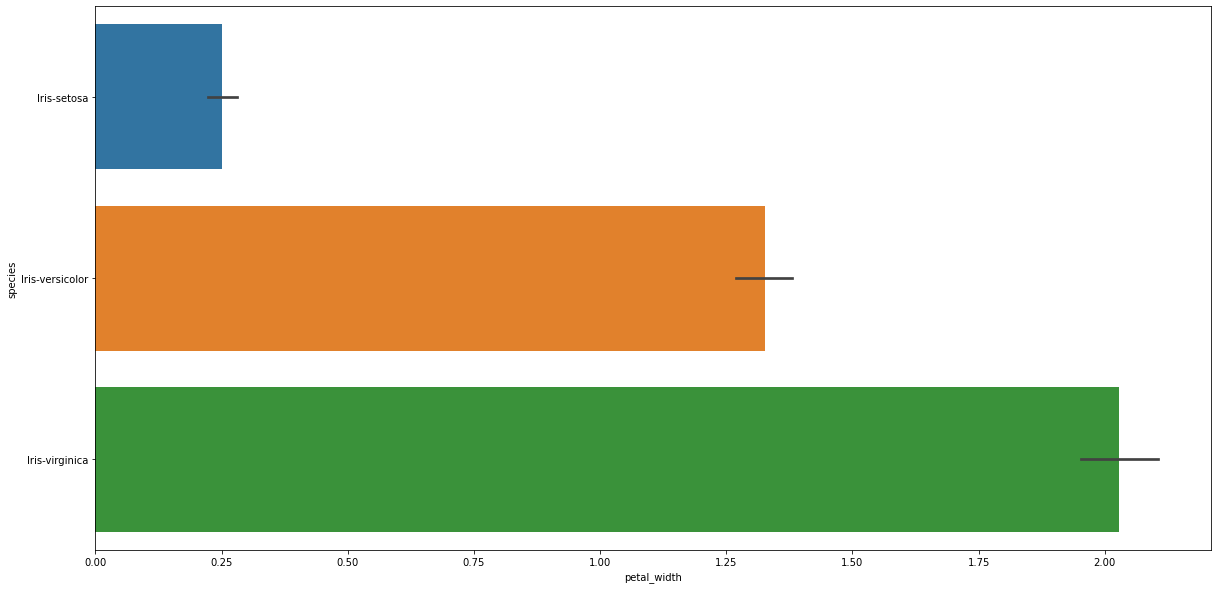

In [133]:
plt.figure(figsize=(20,10))
sns.barplot(x='petal_width',y='species', data=iris_data)

<AxesSubplot:xlabel='sepal_length', ylabel='count'>

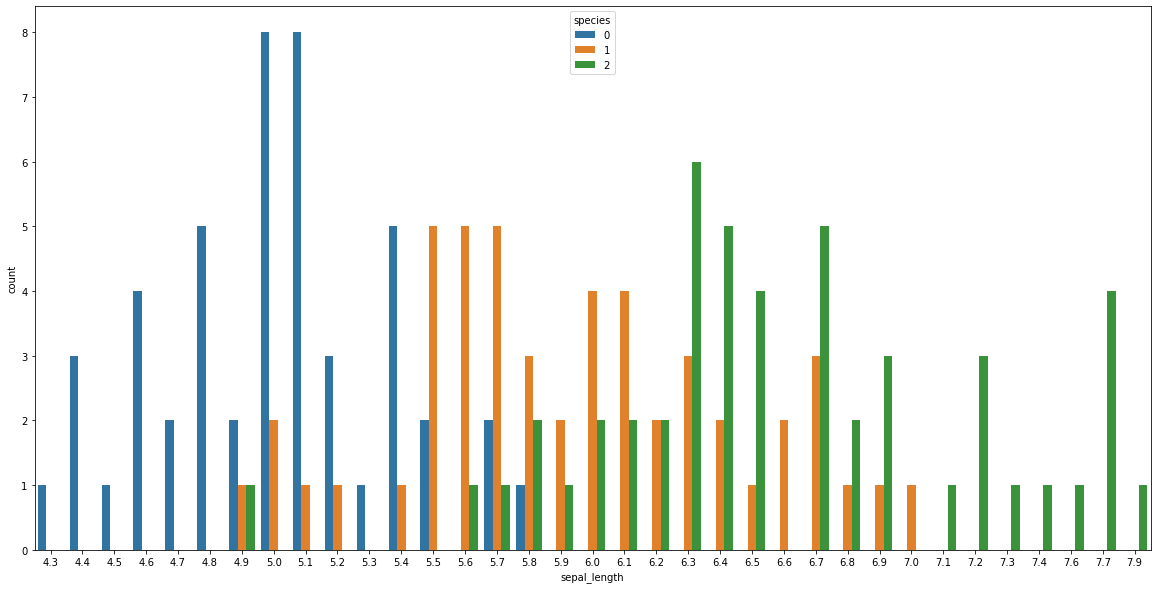

In [145]:
plt.figure(figsize=(20,10))
sns.countplot('sepal_length', hue='species', data=iris_data)



# 5.Data Preprocessing and Feature Engineering

In [135]:
#preprocessing the species column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris_data['species']=le.fit_transform(iris_data['species'])

## correlation

In [136]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:>

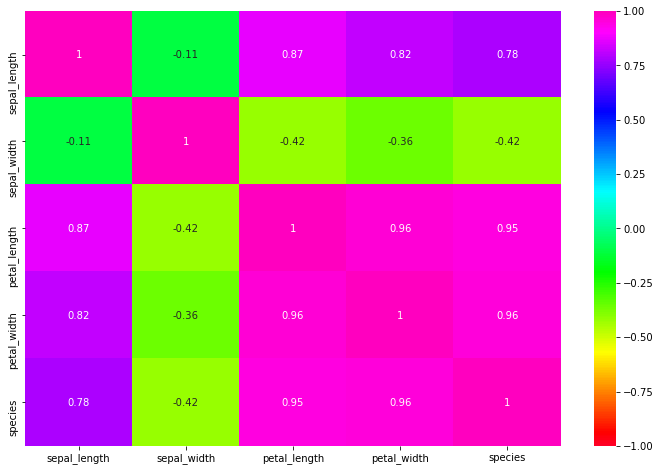

In [137]:
corr=iris_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='gist_rainbow',vmin=-1,vmax=1)

In [138]:
iris_data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


## 6.Modelling

In [139]:
#Dependent variable is also referred as target variable and the independent variables are called the predictors.
#defining predictor variables and target variable
X=iris_data.drop('species',axis=1)
y=iris_data.species

In [140]:
#splitting data into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [141]:
from sklearn.linear_model import LogisticRegression
#Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.).
model= LogisticRegression()
#fitting our model to the data
model.fit(X_train,y_train)

LogisticRegression()

In [142]:
#our predictions
prediction=model.predict(X_test)

In [143]:
#accuracy of our model
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix
print(accuracy_score(prediction,y_test))



0.9333333333333333


## Deployment